## 基礎題 - 算出斜率w與截距b

y = wx + b

記得計算前X須符合資料格式
$$[x_1, x_2, \ldots, x_{50}]$$

==> 

$$[[x_1], [x_2], \ldots, [x_{50}]]$$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

訓練完成後的線性回歸方程： y = 1.6170x + 0.2731


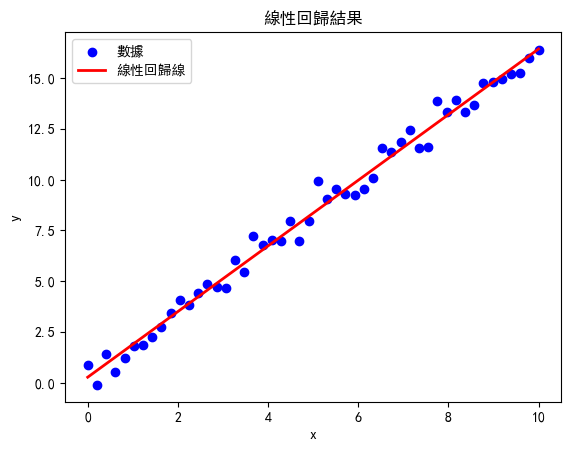

In [7]:
import matplotlib.pyplot as plt

# 設定全域字型為 SimHei（支援中文）
plt.rcParams['font.sans-serif'] = ['SimHei']  

# 避免負號無法顯示
plt.rcParams['axes.unicode_minus'] = False  

# 匯入在 sklearn.linear_model 套件裡面的 LinearRegression 模型
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 提供的 x, y 數據
x = np.array([ 0. , 0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
               1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
               2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
               3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
               4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
               5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
               6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
               7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
               8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
               9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10. ])
y = np.array([ 0.85848224, -0.10657947,  1.42771901,  0.53554778,  1.20216826,
               1.81330509,  1.88362644,  2.23557653,  2.7384889 ,  3.41174583,
               4.08573636,  3.82529502,  4.39723111,  4.8852381 ,  4.70092778,
               4.66993962,  6.05133235,  5.44529881,  7.22571332,  6.79423911,
               7.05424438,  7.00413058,  7.98149596,  7.00044008,  7.95903855,
               9.96125238,  9.06040794,  9.56018295,  9.30035956,  9.26517614,
               9.56401824, 10.07659844, 11.56755942, 11.38956185, 11.83586027,
              12.45642786, 11.58403954, 11.60186428, 13.88486667, 13.35550112,
              13.93938726, 13.31678277, 13.69551472, 14.76548676, 14.81731598,
              14.9659187 , 15.19213921, 15.28195017, 15.97997265, 16.41258817])

# **將模型工具指派給一變數做使用**
model = LinearRegression()  # 建立線性回歸模型

# **注意轉換 x 的格式 1D -> 2D**
x_2d = x.reshape(-1, 1)  # sklearn 需要 2D 陣列格式  # 1d向量 or 陣列 轉2d矩陣

# **將 x, y 資料導入 LinearRegression 演算法做訓練**
model.fit(x_2d, y)  # 訓練模型

# **列印出訓練完成之函數的斜率與截距**
w = model.coef_[0]  # 斜率
b = model.intercept_  # 截距
print(f"訓練完成後的線性回歸方程： y = {w:.4f}x + {b:.4f}")

# **繪製數據點和回歸線**
plt.scatter(x, y, color='blue', label='數據')  # 繪製數據點
plt.plot(x, model.predict(x_2d), color='red', linewidth=2, label='線性回歸線')  # 繪製回歸線
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('線性回歸結果')
plt.show()

## 進階題 - 切割資料集分別做訓練與預測(訓練資料80%、測試資料20%)


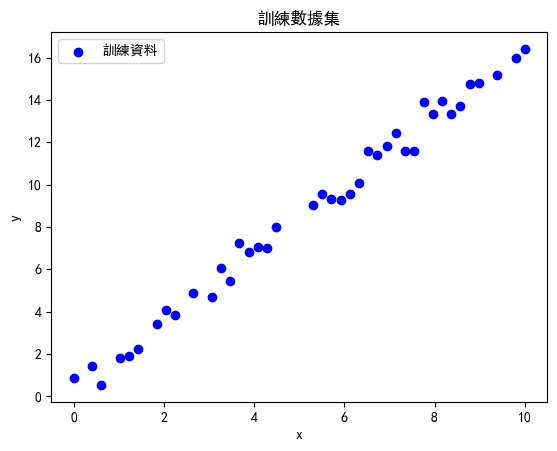

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression  # 匯入 LinearRegression 模型
from sklearn.model_selection import train_test_split  # 匯入 train_test_split 模組

# 生成 x, y 數據
x = np.array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])
y = np.array([ 0.85848224, -0.10657947,  1.42771901,  0.53554778,  1.20216826,
        1.81330509,  1.88362644,  2.23557653,  2.7384889 ,  3.41174583,
        4.08573636,  3.82529502,  4.39723111,  4.8852381 ,  4.70092778,
        4.66993962,  6.05133235,  5.44529881,  7.22571332,  6.79423911,
        7.05424438,  7.00413058,  7.98149596,  7.00044008,  7.95903855,
        9.96125238,  9.06040794,  9.56018295,  9.30035956,  9.26517614,
        9.56401824, 10.07659844, 11.56755942, 11.38956185, 11.83586027,
       12.45642786, 11.58403954, 11.60186428, 13.88486667, 13.35550112,
       13.93938726, 13.31678277, 13.69551472, 14.76548676, 14.81731598,
       14.9659187 , 15.19213921, 15.28195017, 15.97997265, 16.41258817])

# 轉換 x 的格式 (1D -> 2D)
x = x.reshape(-1, 1)

# 切割數據集 (80% 訓練數據, 20% 測試數據，設定 random_state=20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

# 畫出訓練資料集的 Matplotlib 圖形
plt.scatter(x_train, y_train, color='blue', label='訓練資料')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('訓練數據集')
plt.show()

## 用訓練資料來 fit 函數
1. 只用訓練資料集的資料進行linear regression演算法<br>
2. 並計算出訓練階段的MSE
3. 畫出目標點(藍色)與預測點(紅色)的對應圖
![](images/LR_train.PNG)

訓練階段的 MSE: 0.2284495300761316


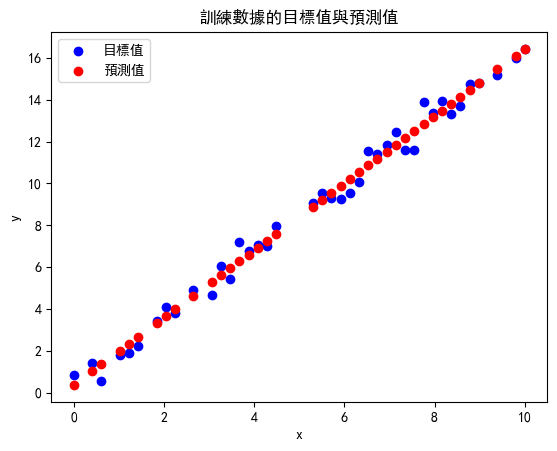

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression  # 匯入 LinearRegression 模型
from sklearn.model_selection import train_test_split  # 匯入 train_test_split 模組
from sklearn.metrics import mean_squared_error  # 匯入 MSE 計算函數

# 生成 x, y 數據
x = np.array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])
y = np.array([ 0.85848224, -0.10657947,  1.42771901,  0.53554778,  1.20216826,
        1.81330509,  1.88362644,  2.23557653,  2.7384889 ,  3.41174583,
        4.08573636,  3.82529502,  4.39723111,  4.8852381 ,  4.70092778,
        4.66993962,  6.05133235,  5.44529881,  7.22571332,  6.79423911,
        7.05424438,  7.00413058,  7.98149596,  7.00044008,  7.95903855,
        9.96125238,  9.06040794,  9.56018295,  9.30035956,  9.26517614,
        9.56401824, 10.07659844, 11.56755942, 11.38956185, 11.83586027,
       12.45642786, 11.58403954, 11.60186428, 13.88486667, 13.35550112,
       13.93938726, 13.31678277, 13.69551472, 14.76548676, 14.81731598,
       14.9659187 , 15.19213921, 15.28195017, 15.97997265, 16.41258817])

# 轉換 x 的格式 (1D -> 2D)
x = x.reshape(-1, 1)

# 切割數據集 (80% 訓練數據, 20% 測試數據，設定 random_state=20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

# 建立 Linear Regression 模型並訓練
model = LinearRegression()
model.fit(x_train, y_train)

# 計算訓練數據的預測值
y_train_pred = model.predict(x_train)

# 計算訓練階段的 MSE
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"訓練階段的 MSE: {mse_train}")

# 畫出目標點 (藍色) 與預測點 (紅色) 的對應圖
plt.scatter(x_train, y_train, color='blue', label='目標值')
plt.scatter(x_train, y_train_pred, color='red', label='預測值')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('訓練數據的目標值與預測值')
plt.show()


## 將訓練出來的函數預測測試集的X值
1. 使用剛剛訓練出來的模型進行測試資料集的資料預測*注意reshape<br>
使用X = 2.44897959，預測出來數值應該為 4.3025375<br>
所有測試集資料
$$\widehat{y}=xw+b=w_{1}x_{1}+b$$

In [29]:
# 測試階段預測
y_test_pred = model.predict(x_test)

X_new = np.array([[2.44897959]])  # 注意要轉換為 2D 陣列
y_pred = model.predict(X_new)
print(f"當 X = 2.44897959 時，預測的 Y 值為: {y_pred[0]}")

當 X = 2.44897959 時，預測的 Y 值為: 4.302537504954737


2. 並計算出測試階段的MSE

In [31]:
# 計算測試階段的 MSE
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"測試階段的 MSE: {mse_test}")

測試階段的 MSE: 0.41344072565862955


3. 畫出目標點(藍色)與預測點(紅色)的對應圖
![](images/LR_test.PNG)

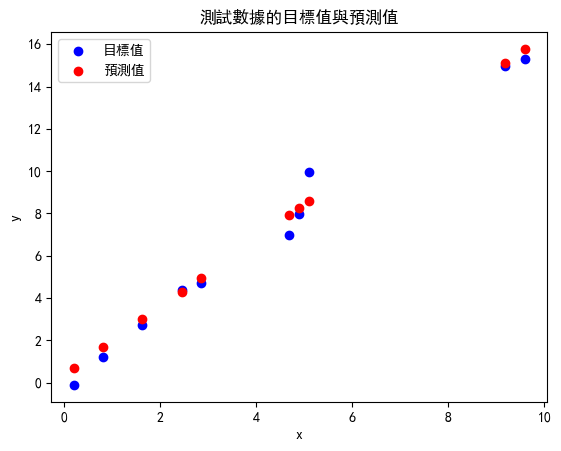

In [35]:

# 畫出測試數據的目標值 (藍色) 與預測值 (紅色)
plt.scatter(x_test, y_test, color='blue', label='目標值')
plt.scatter(x_test, y_test_pred, color='red', label='預測值')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('測試數據的目標值與預測值')
plt.show()
